In [0]:
from google.colab import drive,files

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Imports go here

import pickle
import keras
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
from keras.layers import Dense, Activation,BatchNormalization
import pandas as pd
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
pickletraindata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_full.pkl'
picklevaldata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_val_full.pkl'
pickletestdata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_test_full.pkl'

pickletraindata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y2.pkl'
picklevaldata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y2.pkl'
pickletestdata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y2.pkl'

pickletraindata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y1.pkl'
picklevaldata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y1.pkl'
pickletestdata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y1.pkl'

pickletrainavg_Y4 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y4_avg.pkl'
picklevalavg_Y4 = 'gdrive/My Drive/DL Project/PickleFiles/pickleVal_Y4_avg.pkl'
pickletestavg_Y4 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTest_Y4_avg.pkl'

In [0]:
# Reading train_X from the pickle files into the session and reshaping it as 66071 samples of a 3-D array

train_X_list = pickle.load(open(pickletraindata_X, 'rb' ))
train_X = np.array(train_X_list)
train_X=train_X.reshape(len(train_X_list),7,7,512)
print(train_X.shape)

(66071, 7, 7, 512)


In [0]:
# Loading train_Y1

train_Y1_list = pickle.load(open(pickletraindata_Y1, 'rb' ))
train_Y1 = np.array(train_Y1_list)
print(train_Y1.shape)

(66071, 172)


In [0]:
# Reading train_Y2 from the pickle files and modifying the ingredient vector to have {1,0}.

train_Y2_list = pickle.load(open(pickletraindata_Y2, 'rb' ))
train_Y2 = np.array(train_Y2_list)

for index in range(train_Y2.shape[0]):
  templist = train_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  train_Y2[index] = templist_0

print(train_Y2.shape)

(66071, 353)


In [0]:
train_Y4_list = pickle.load(open(pickletrainavg_Y4, 'rb' ))
train_Y4 = np.array(train_Y4_list)
print(train_Y4.shape)

(66071,)


In [0]:
# Reading val_X from the pickle files into the session and reshaping it as 11016 samples of a 3-D array

val_X_list = pickle.load(open(picklevaldata_X, 'rb' ))
val_X = np.array(val_X_list)
val_X=val_X.reshape(len(val_X_list),7,7,512)
print(val_X.shape)

(11016, 7, 7, 512)


In [0]:
# Loading val_Y1

val_Y1_list = pickle.load(open(picklevaldata_Y1, 'rb' ))
val_Y1 = np.array(val_Y1_list)
print(val_Y1.shape)

(11016, 172)


In [0]:
# Loading val_Y2

val_Y2_list = pickle.load(open(picklevaldata_Y2, 'rb' ))
val_Y2 = np.array(val_Y2_list)

for index in range(val_Y2.shape[0]):
  templist = val_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  val_Y2[index] = templist_0

print(val_Y2.shape)

(11016, 353)


In [0]:
val_Y4_list = pickle.load(open(picklevalavg_Y4, 'rb' ))
val_Y4 = np.array(val_Y4_list)
print(val_Y4.shape)

(11016,)


In [0]:
# Loading test_X from the pickle files into the session and reshaping it as 11016 samples of a 3-D array

test_X_list = pickle.load(open(pickletestdata_X, 'rb' ))
test_X = np.array(test_X_list)
test_X=test_X.reshape(len(test_X_list),7,7,512)
print(test_X.shape)

(33154, 7, 7, 512)


In [0]:
# Loading test_Y1

test_Y1_list = pickle.load(open(pickletestdata_Y1, 'rb' ))
test_Y1 = np.array(test_Y1_list)
print(test_Y1.shape)

(33154, 172)


In [0]:
# Loading test_Y2

test_Y2_list = pickle.load(open(pickletestdata_Y2, 'rb' ))
test_Y2 = np.array(test_Y2_list)

for index in range(test_Y2.shape[0]):
  templist = test_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  test_Y2[index] = templist_0
  
print(test_Y2.shape)

(33154, 353)


In [0]:
test_Y4_list = pickle.load(open(pickletestavg_Y4, 'rb' ))
test_Y4 = np.array(test_Y4_list)
print(test_Y4.shape)

(33154,)


### Model 1: The layers are CNN--> Ingredient --> Calorie

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 2048)        9439232   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 2048)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 1024)        18875392  
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 1024)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2, 2, 1024)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 1024)        9438

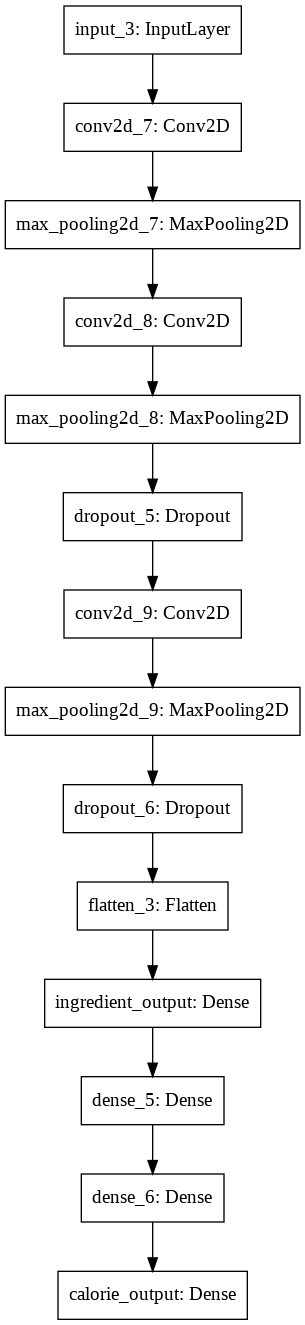

In [0]:
# Regression Model for Calorie Estimation. convolution --> ingredient output ---> calorie estimation

inputs = Input(shape=(7,7,512))

conv2D4 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)

conv2D5 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(maxPool2D4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.5)(maxPool2D5)

conv2D6 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout5)
maxPool2D6 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D6)
dropout6 = Dropout(0.7)(maxPool2D6)

flattened6 = Flatten()(dropout6)
output1 = Dense(353,activation='sigmoid',name='ingredient_output')(flattened6)  ##  Ingredient recognition
dense1 =  Dense(100, activation='relu')(output1) 
dense2 =  Dense(20, activation='relu')(dense1)
output2 = Dense(1,activation='linear', name='calorie_output')(dense2)  ##  Calorie Estimation

model = Model(inputs=inputs, outputs=[output2])
print(model.summary()) # summarize layers
plot_model(model, to_file='Calorie Estimation with Ingredient Recognition.png') # plot graph

In [0]:
model.compile(optimizer=Adam(lr=0.0005),
              loss=['mse'],
              metrics=['mae'])

In [0]:
model.fit(train_X, [train_Y4], batch_size=256, epochs=40,validation_data = (val_X, [val_Y4]))

Train on 66071 samples, validate on 11016 samples
Epoch 1/40
66071/66071 [==============================] - 30s 456us/step - loss: 38753.4695 - mean_absolute_error: 149.9759 - val_loss: 24948.7842 - val_mean_absolute_error: 127.1692
Epoch 2/40
66071/66071 [==============================] - 29s 433us/step - loss: 25236.1067 - mean_absolute_error: 125.3869 - val_loss: 24830.4167 - val_mean_absolute_error: 125.5667
Epoch 3/40
66071/66071 [==============================] - 28s 431us/step - loss: 25247.1534 - mean_absolute_error: 125.4882 - val_loss: 24907.7371 - val_mean_absolute_error: 126.6626
Epoch 4/40
66071/66071 [==============================] - 28s 430us/step - loss: 25255.6433 - mean_absolute_error: 125.3560 - val_loss: 24846.6714 - val_mean_absolute_error: 125.5594
Epoch 5/40
66071/66071 [==============================] - 28s 430us/step - loss: 25277.8359 - mean_absolute_error: 125.6037 - val_loss: 24853.4932 - val_mean_absolute_error: 124.7699
Epoch 6/40
66071/66071 [===========

 #### Model 2: Only Ingredient vector Y2 as input and Sum Calorie value Y4 as ouput.

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 353)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 353)               124962    
_________________________________________________________________
dropout_5 (Dropout)          (None, 353)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               35400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
calorie_output (Dense)       (None, 1)                 101       
Total params: 160,463
Trainable params: 160,463
Non-trainable params: 0
_____________________________________________________

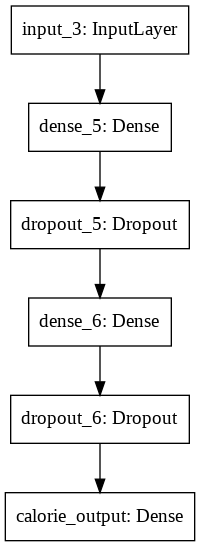

In [0]:
# Multi-layer perceptron for the regression

inputs = Input(shape=(353,))
dense1 =  Dense(353,activation='relu')(inputs) 
dropout1 = Dropout(0.25)(dense1)
dense2 =  Dense(100, activation='relu')(dropout1) 
dropout2 = Dropout(0.25)(dense2)
#dense3 =  Dense(20, activation='relu')(dropout2)
output1 = Dense(1,activation='linear', name='calorie_output')(dropout2)  ##  Calorie Estimation
model = Model(inputs=inputs, outputs=[output1])
print(model.summary()) # summarize layers
plot_model(model, to_file='Calorie Estimation with Ingredient Recognition without CNN.png') # plot graph

In [0]:
model.compile(optimizer=Adam(lr=0.0005),
              loss=['mse'],
              metrics=['mae','accuracy'])

In [0]:
model.fit(train_Y2, train_Y4, batch_size=256, epochs=30,validation_data = (val_Y2, val_Y4))

Train on 66071 samples, validate on 11016 samples
Epoch 1/30
66071/66071 [==============================] - 2s 24us/step - loss: 4515.8949 - mean_absolute_error: 49.0719 - acc: 0.0029 - val_loss: 927.4280 - val_mean_absolute_error: 19.3934 - val_acc: 0.0075
Epoch 2/30
66071/66071 [==============================] - 1s 19us/step - loss: 506.8468 - mean_absolute_error: 13.9514 - acc: 0.0125 - val_loss: 226.6788 - val_mean_absolute_error: 8.7885 - val_acc: 0.0275
Epoch 3/30
66071/66071 [==============================] - 1s 18us/step - loss: 243.5394 - mean_absolute_error: 9.9694 - acc: 0.0178 - val_loss: 131.9937 - val_mean_absolute_error: 6.5151 - val_acc: 0.0316
Epoch 4/30
66071/66071 [==============================] - 1s 19us/step - loss: 180.2886 - mean_absolute_error: 8.7080 - acc: 0.0204 - val_loss: 91.2994 - val_mean_absolute_error: 5.2075 - val_acc: 0.0422
Epoch 5/30
66071/66071 [==============================] - 1s 19us/step - loss: 152.8497 - mean_absolute_error: 8.1172 - acc: 0.

In [0]:
predictions_y4 = model.predict(test_Y2)

In [0]:
error = np.sqrt(np.mean(np.square(test_Y4 - predictions_y4.flatten())))
error

3.619184432973262

 #### Model 3: Takes both Ingredient Y2 and Food Category Y1 as inputs without CNN and outputs calorie value Y4

In [0]:
train_Y = np.concatenate((train_Y1,train_Y2),axis=1)

In [0]:
val_Y = np.concatenate((val_Y1,val_Y2),axis=1)

In [0]:
test_Y = np.concatenate((test_Y1,test_Y2),axis=1)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 525)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 525)               276150    
_________________________________________________________________
dropout_10 (Dropout)         (None, 525)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               134656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               25700     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0   

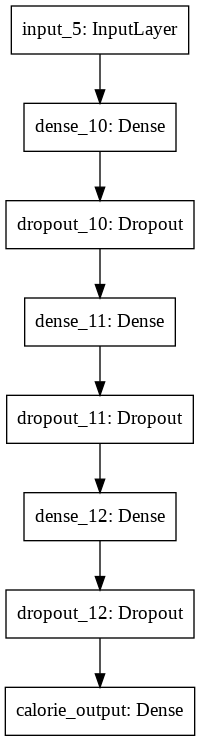

In [0]:
# Multi-layer perceptron for the regression taking both food category and ingredient as input

inputs = Input(shape=(525,))
dense1 =  Dense(525,activation='relu')(inputs) 
dropout1 = Dropout(0.25)(dense1)
dense2 =  Dense(256, activation='relu')(dropout1) 
dropout2 = Dropout(0.25)(dense2)
dense3 =  Dense(100, activation='relu')(dropout2)
dropout3 = Dropout(0.25)(dense3)
output1 = Dense(1,activation='linear', name='calorie_output')(dropout3)  ##  Calorie Estimation
model_1 = Model(inputs=inputs, outputs=[output1])
print(model_1.summary()) # summarize layers
plot_model(model_1, to_file='Calorie Estimation with Ingredient Recognition and Food without CNN.png') # plot graph

In [0]:
model_1.compile(optimizer=Adam(lr=0.0005),
              loss=['mse'],
              metrics=['mae','accuracy'])

In [0]:
model_1.fit(train_Y, train_Y4, batch_size=256, epochs=30,validation_data = (val_Y, val_Y4))

Train on 66071 samples, validate on 11016 samples
Epoch 1/30
66071/66071 [==============================] - 2s 33us/step - loss: 2033.5739 - mean_absolute_error: 27.4778 - acc: 0.0106 - val_loss: 121.2128 - val_mean_absolute_error: 6.7355 - val_acc: 0.0253
Epoch 2/30
66071/66071 [==============================] - 2s 25us/step - loss: 171.3130 - mean_absolute_error: 8.9299 - acc: 0.0189 - val_loss: 51.2682 - val_mean_absolute_error: 4.1977 - val_acc: 0.0581
Epoch 3/30
66071/66071 [==============================] - 2s 24us/step - loss: 127.8777 - mean_absolute_error: 7.8565 - acc: 0.0218 - val_loss: 31.4938 - val_mean_absolute_error: 3.2659 - val_acc: 0.0581
Epoch 4/30
66071/66071 [==============================] - 2s 24us/step - loss: 111.9934 - mean_absolute_error: 7.4228 - acc: 0.0224 - val_loss: 23.9055 - val_mean_absolute_error: 2.9427 - val_acc: 0.0532
Epoch 5/30
66071/66071 [==============================] - 2s 24us/step - loss: 105.7036 - mean_absolute_error: 7.2477 - acc: 0.0224

In [0]:
predictions_1 = model_1.predict(test_Y)

In [0]:
error = np.sqrt(np.mean(np.square(test_Y4 - predictions_1.flatten())))
error

2.8518910980478975